## Time Series Analysis of Bitcoin

The historical data of Bitcoin cryptocurrency was extracted from YahooFinance since it was introduced in the market first. The main aim of the time series data is to understand the trend in of the Bitcoin price and forecast the change in future price.

Let's get started by importing the necessary libraries first.

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached yfinance-0.2.12-py2.py3-none-any.whl (59 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
  Using cached beautifulsoup4-4.11.2-py3-none-any.whl (129 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.7 MB/s eta 0:00:00
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninst

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
crypto = 'BTC-USD'
start = datetime.datetime(2014, 9, 15)
end = datetime.datetime(2022, 10, 22)
crypto_data= yf.download(crypto, start=start, end=end, interval='1d')
crypto_data.reset_index(inplace=True)
crypto_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


We will be just working on the Closing price from the Price. 

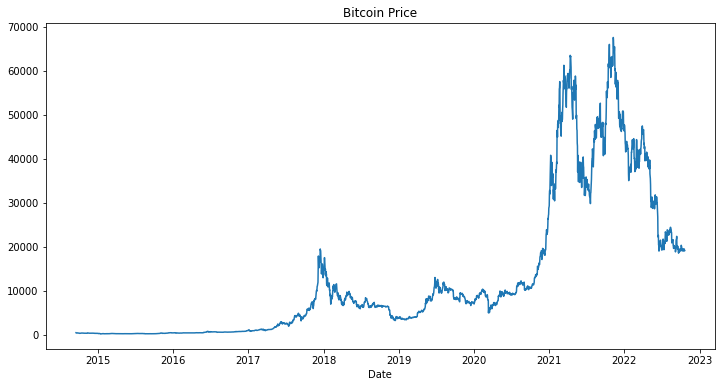

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(crypto_data['Date'],crypto_data['Close'])
plt.xlabel('Date')
plt.title('Bitcoin Price')
plt.show()

The above graph shows us that even though bitcoin was introduced in the market in September of 2014, not much of the price change was seen in it. However, it reached it's first peak by the end of 2017. Upon researching, we got to know that due to fall in the price of Bitcoin, another cyrpot currency Tehter was used to buy Bitcoins at a large number which rose its price in that time frame. This market manipulation was the reason behind the BTC price boom in 2017. 

After this the price gradually decreased following which it experienced significant rise is its price 20000 USD to approx. 60000 USD in 2021 because corporate officials started buying Bitcoing as an inflation hedge. This activity resulted into 300% increase in Bitcoin price by the end of 2nd quarter of 2021.

Also this graph shows how non-stationary the data is. We cannot work with the non-stationary data in time series analysis. So we need to make it stationary by taking the first difference approach.

But before that, let's see is there is any null values in the data and get an idea a about the anomalies(outliers) in the data.

In [ ]:
#Check for the null values
crypto_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#outlier detection
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(crypto_data['Close'].\
values.reshape(-1, 1))
crypto_scaled = pd.DataFrame(crypto_scaled)

In [ ]:
contamination = 0.01
isolation_forest = IsolationForest(contamination=contamination)
isolation_forest.fit(crypto_scaled)
crypto_scaled['anomaly'] = isolation_forest.predict(crypto_scaled)

In [ ]:
crypto_scaled['anomaly'].value_counts()

 1    2928
-1      29
Name: anomaly, dtype: int64

So we found 30 anomalies in the above data sample. Since the ratio is very small, we can ignore them and move forward without treating them.

Let's compute the first difference on the series.

- First differences (and second and third differences) help determine whether there is a pattern in a set of data, as well as the nature of the pattern.

In [ ]:
crypto_data['First Difference']=crypto_data['Close'].diff()

In [ ]:
crypto_data.dropna(inplace=True)

In [ ]:
crypto_data

,Date,Open,High,Low,Close,Adj Close,Volume,First Difference
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-32.894012
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-29.644012
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,14.108002
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-10.082977
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,3.330994
...,...,...,...,...,...,...,...,...
2952,2022-10-17,19268.562500,19635.802734,19173.333984,19550.757812,19550.757812,27472552998,282.664062
2953,2022-10-18,19550.466797,19666.994141,19144.769531,19334.416016,19334.416016,30580012344,-216.341797
2954,2022-10-19,19335.027344,19348.416016,19127.687500,19139.535156,19139.535156,22425387184,-194.880859
2955,2022-10-20,19138.085938,19315.199219,18971.458984,19053.740234,19053.740234,24493974420,-85.794922


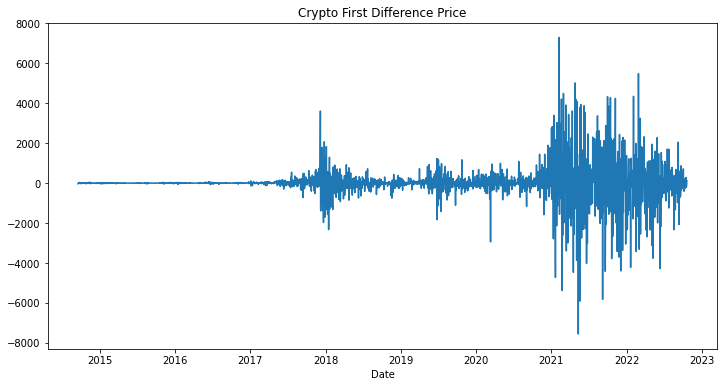

In [ ]:
#plotting first difference graph
plt.figure(figsize=(12,6))
plt.plot(crypto_data['Date'],crypto_data['First Difference'])
plt.xlabel('Date')
plt.title('Crypto First Difference Price')
plt.show()

Now the data is centered towards 0. However, it can be seen in the graph that the variance is increasing exponentially. When Bitcoin was introduced to the market at first in 2014, its price did not change as much in first 3 years. However after 1st quarter in 2017, its priced started changing rapidly. BTC saw its first peak in 2018 and significant growth in its price by the start of 2021. This exponential increase in the variance can be seen in the graph which tells us that the data is not stationary. To make it stationary we can apply log tranformation to the series. 

<AxesSubplot:xlabel='Date'>

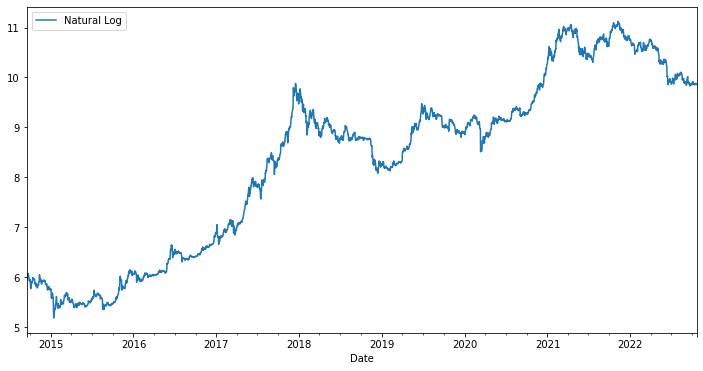

In [ ]:
#applying log tranform to make data stationary

crypto_data['Natural Log'] = crypto_data['Close'].apply(lambda x: np.log(x))  
crypto_data.plot('Date','Natural Log',figsize=(12,6))

We will compute the variance of Natual Log over time and plot it to visually see the effect of the log transform. 

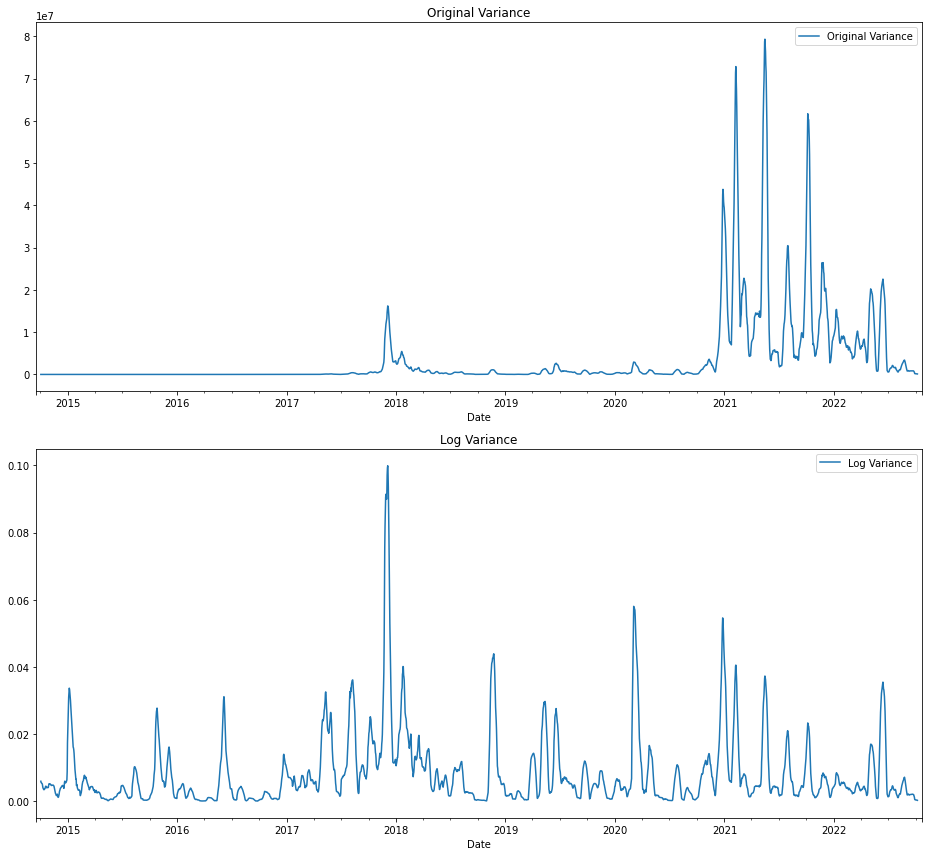

In [ ]:
crypto_data['Original Variance'] = crypto_data['Close'].rolling(30, min_periods=None, center=True).var()
crypto_data['Log Variance'] = crypto_data['Natural Log'].rolling(30, min_periods=None, center=True).var()

fig, ax = plt.subplots(2, 1, figsize=(13, 12))
crypto_data.plot('Date','Original Variance',ax=ax[0], title='Original Variance')
crypto_data.plot('Date','Log Variance',ax=ax[1], title='Log Variance')
fig.tight_layout()

No variations are observed till late 2017 in the top graph. However in the bottom graph, variations can be observed through entire dataset. This shows that variance is now constant through the dataset after log transformation. Though we still we need to take the first difference on the Natural Log.

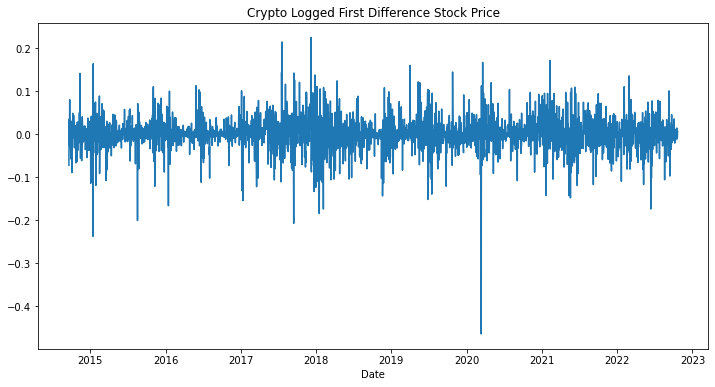

In [ ]:
crypto_data['Logged First Difference'] = crypto_data['Natural Log'].diff()
plt.figure(figsize=(12,6))
plt.plot(crypto_data['Date'],crypto_data['Logged First Difference'])
plt.xlabel('Date')
plt.title('Crypto Logged First Difference Stock Price')
plt.show()

Now we have a somewhat stationary data. Let's create some lag variables to examine its relationship with the same variables to check for the seasonality effect.

In [ ]:
crypto_data['Lag 1'] = crypto_data['Logged First Difference'].shift()  
crypto_data['Lag 2'] = crypto_data['Logged First Difference'].shift(2)  
crypto_data['Lag 5'] = crypto_data['Logged First Difference'].shift(5)  
crypto_data['Lag 30'] = crypto_data['Logged First Difference'].shift(30)

We can create a jointplot to see the relation between orignial variable vs lagged variable.

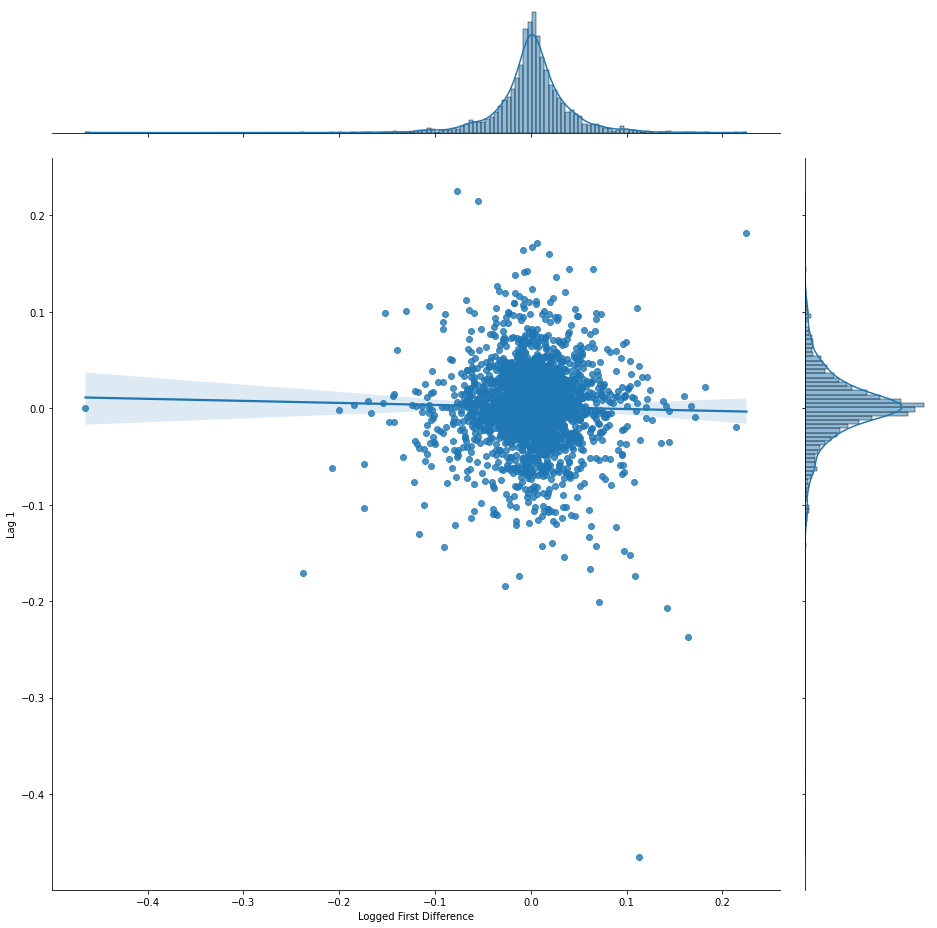

In [ ]:
import seaborn as sns
sns.jointplot('Logged First Difference', 'Lag 1', crypto_data, kind='reg', size=13)

The above scatter plot shows that the data is evenly distributed, ignoring few anomalies. It hardly gives us any idea about what action will happen the next day.

The result stays the same for other lag values taken as well. However it is not practical to and the result for all the lag values. But we can apply acf and pacf function to do that. 

In [ ]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
lag_correlations = acf(crypto_data['Logged First Difference'].iloc[1:])  
lag_partial_correlations = pacf(crypto_data['Logged First Difference'].iloc[1:])

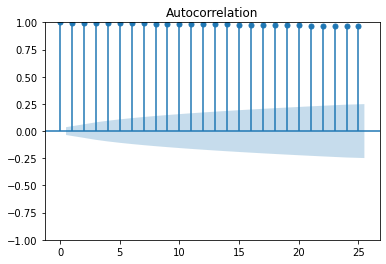

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(crypto_data['Close'], lags=25);

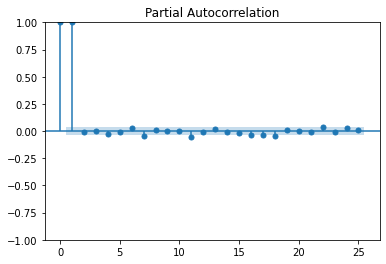

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(crypto_data['Natural Log'], lags=25);

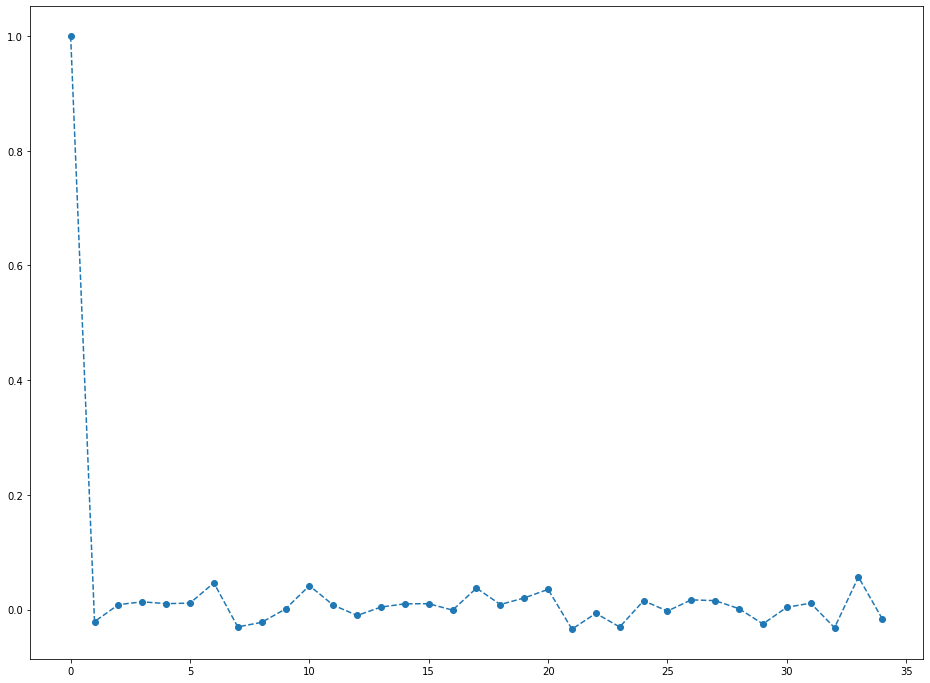

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations, marker='o', linestyle='--')

The above graph shows that the data is random walk and there is no significant (< 0.2) relationship between the value at time t and any other step before that.

We can break the trends and analyse it by implementing the decompostion method.

<AxesSubplot:>

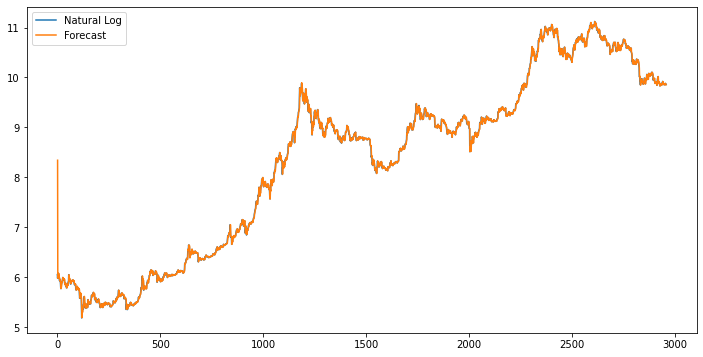

In [ ]:
model = sm.tsa.ARIMA(crypto_data['Natural Log'].iloc[1:], order=(12, 0, 0))  
results = model.fit()  
crypto_data['Forecast'] = results.fittedvalues  
crypto_data[['Natural Log', 'Forecast']].plot(figsize=(12,6))

From the above graph, we might think that the forecast was good as the both the lines are indistinguishable. But we got this result because we used Natural Log (un-differenced) for the forecast. Now let's predict the differenced series.

<AxesSubplot:>

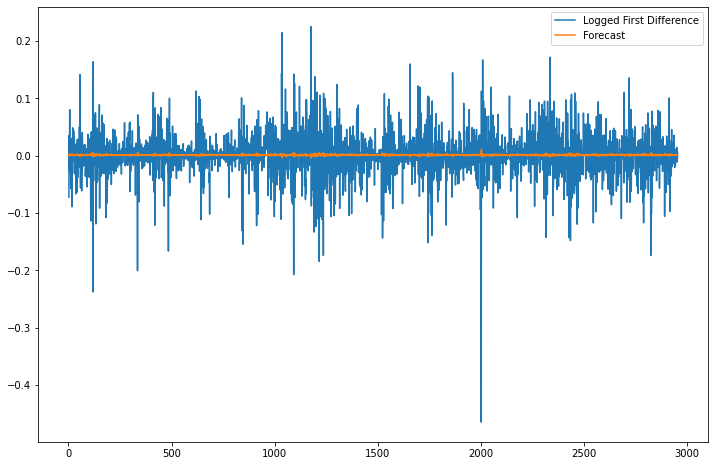

In [ ]:
model = sm.tsa.ARIMA(crypto_data['Logged First Difference'].iloc[1:], order=(1, 0, 0))
results = model.fit()
crypto_data['Forecast'] = results.fittedvalues
crypto_data[['Logged First Difference', 'Forecast']].plot(figsize=(12, 8))

It looks like the predicted changes are much smaller than the data. Let's get a sample of the data and compare the forecast with the same sample.

<AxesSubplot:>

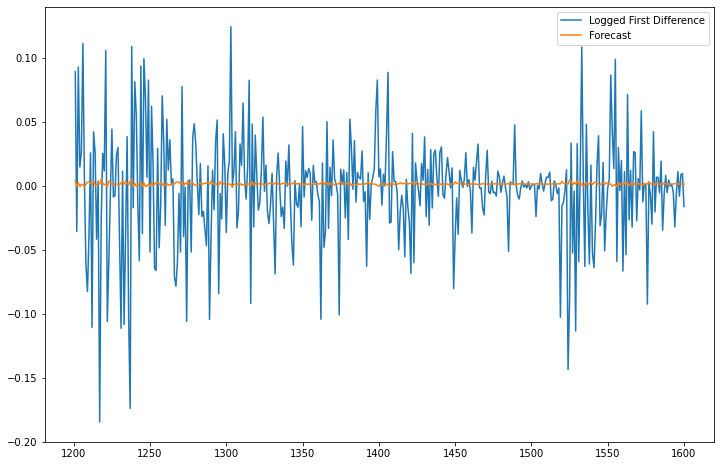

In [ ]:
crypto_data[['Logged First Difference', 'Forecast']].iloc[1200:1600, :].plot(figsize=(12, 8))

For our smaller sample as well, our forecast of the variation is very small compared to the dayily activites in the Bitcoin price.

Moving average did not help much in this case for the forecast.

<AxesSubplot:>

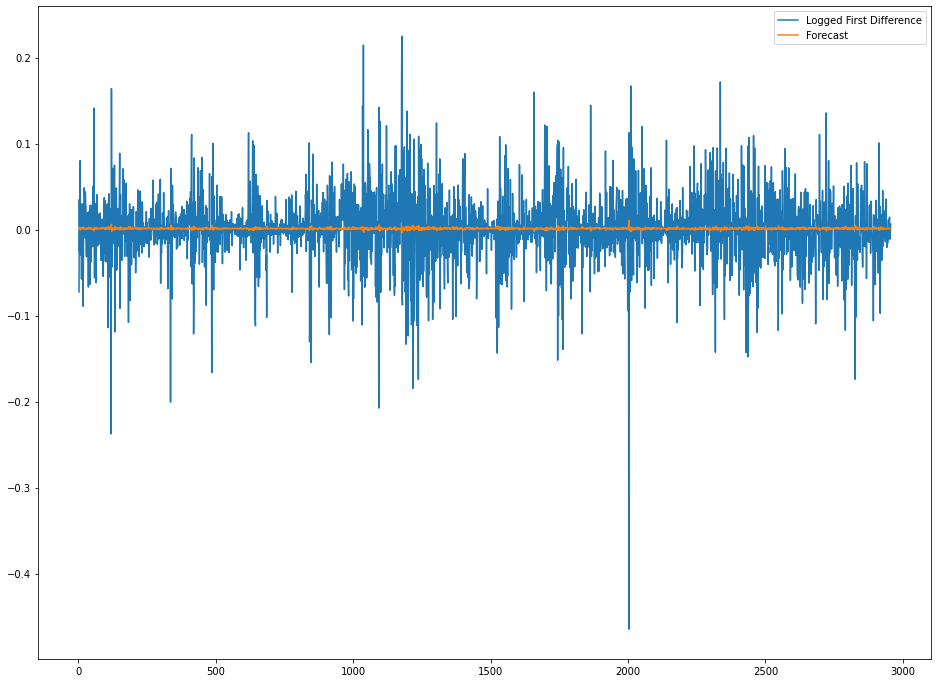

In [ ]:
model = sm.tsa.ARIMA(crypto_data['Logged First Difference'].iloc[1:], order=(0, 0, 1))  
results = model.fit()  
crypto_data['Forecast'] = results.fittedvalues  
crypto_data[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))

Let's try to forecast by splitting the dataset in train and test data. Then compare the result with the results obtained above.

In [ ]:
#splitting the dataset in train and test
logg_train_len = int(len(crypto_data['Logged First Difference'])*0.8)
logg_train = crypto_data['Logged First Difference'][1:logg_train_len]
logg_test = crypto_data['Logged First Difference'][logg_train_len:]

In [ ]:
start = len(logg_train)
end = len(logg_train) + len(logg_test) - 1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ma_model = ARIMA(logg_train, order=(0, 0, 1))
ma_results = ma_model.fit()

In [ ]:
ma_pred = ma_results.predict(start, end)

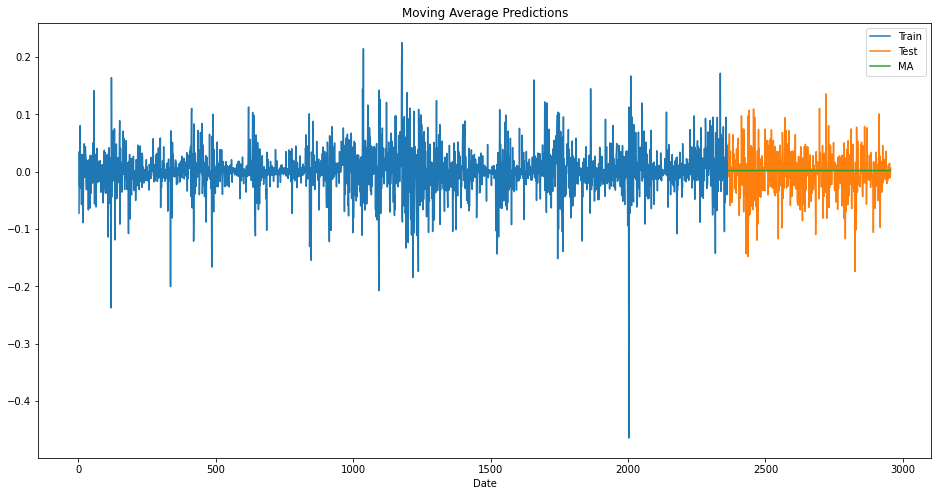

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(logg_train.index, logg_train, label='Train')
plt.plot(logg_test.index, logg_test, label='Test')
plt.plot(ma_pred.index, ma_pred, label='MA')
plt.title('Moving Average Predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

Again... not much help. It makes me believe that forecasting the stock market price is not that easy afterall. Let's end it by running the performance measurement on our logged difference.

In [ ]:
sma = crypto_data['Logged First Difference'].rolling(8).mean()

In [ ]:
sma.dropna(inplace=True)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_sma = mean_absolute_error(crypto_data['Logged First Difference'].iloc[8:], sma)
mse_sma = mean_squared_error(crypto_data['Logged First Difference'].iloc[8:], sma)
rmse_sma = np.sqrt(mean_squared_error(crypto_data['Logged First Difference'].iloc[8:], sma))

In [ ]:
sma_perf = {'mae_sma':mae_sma,
'mse_sma':mse_sma,
'rmse_sma':rmse_sma}
sma_perf = pd.DataFrame([sma_perf])
sma_perf

,mae_sma,mse_sma,rmse_sma
0,0.024239,0.001307,0.036152


Let's try to apply double exponential smoothing.

### Double Exponential Smoothing

In [ ]:
#splitting the dataset in train and test
train_len = int(len(crypto_data['Natural Log'])*0.8)
train = crypto_data['Natural Log'][1:train_len]
test = crypto_data['Natural Log'][train_len:]

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
des_model = Holt(train)
des_result = des_model.fit(smoothing_level=0.3, smoothing_slope=.05)

In [ ]:
des_pred = des_result.predict(start, end)
des_pred.index = test.index

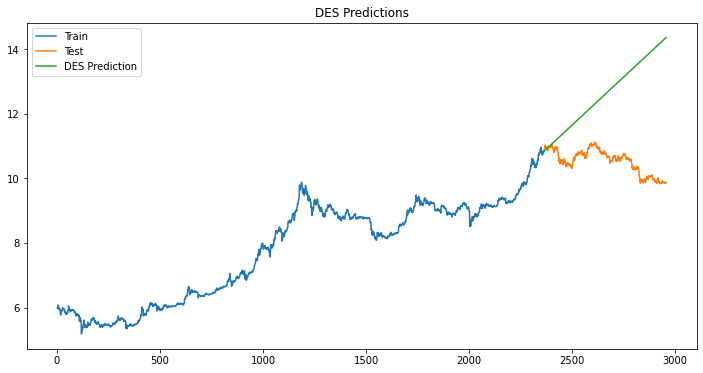

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(des_pred.index, des_pred, label='DES Prediction')
plt.title('DES Predictions')
plt.legend()
plt.show()

The prediction is not working well in this case as well.

In [ ]:
mae_des = mean_absolute_error(test, des_pred)
mse_des= mean_squared_error(test, des_pred)
rmse_des = np.sqrt(mean_squared_error(test, des_pred))

In [ ]:
des_perf = {'mae_des':mae_des,
'mse_des':mse_des,
'rmse_des':rmse_des}
des_perf = pd.DataFrame([des_perf])
des_perf

,mae_des,mse_des,rmse_des
0,2.075683,6.027001,2.454995


We can see that the this prediction is also not working in our favor. The slope is in the opposite direction of the test trend.